\begin{equation} 
	\begin{aligned}
		V(x) \quad  = \quad \max_{y} \quad & {U\big(x,y\big) + \beta V(y)}\\
		\textrm{s.t.} \quad & y \in \Gamma(x)
	\end{aligned}
\end{equation}

In [1]:
using  Plots, LinearAlgebra, Optim, DataFrames, StatFiles, Distributions, Roots, Random, Interpolations, BenchmarkTools
using PGFPlotsX

In [2]:
function VFI(U, β, Γ, Range, l, IG, ; ϵ=10^-6)
    Random.seed!(1401)
    G = range(Range[1], Range[2], l)
    V = IG.(G) #Initial Value function
    V_next = Array{Float64}(undef, l)
    g = Array{Float64}(undef, l) #Policy function
    sup = 1
    while ~(isapprox(sup, 0.0; atol=ϵ, rtol=0))
        V0 = LinearInterpolation(G, V[:,end], extrapolation_bc=Line())
        Threads.@threads for i in 1:l
            Ω(y) = -(U(G[i],y) + β*V0(y))
            opt = optimize(Ω, Γ(G[i])[1], Γ(G[i])[2])
            g[i] = opt.minimizer
            V_next[i] = -Ω(g[i])
        end
        V = hcat(V,V_next)
        sup = maximum(abs.(V[:,end] .- V[:,end-1]))
    end
    return V[:,end], g
end

VFI (generic function with 1 method)

In [3]:
σ = 0.8
w = 4
β = 0.90
l = 100
r = 0.07
IG(x) = √x
U(x,y) = (((1+r)*x + w - y)^(1-σ)) / (1-σ)
Γ(x) = [10^-6, (1+r)*x + w]
ur = 40
Range = [10^-6,Γ(ur)[2]]
Value_funcrion, Policy_function = VFI(U, β, Γ, Range, l, IG ; ϵ=10^-6);

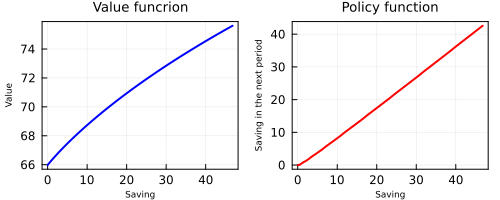

In [4]:
plots = []
p1 = plot(range(Range[1], Range[2], l), Value_funcrion, title = "Value funcrion", label=false, c="blue", lw = 2, titlefontsize=9, guidefontsize=6)
push!(plots,p1)
xlabel!("Saving")
ylabel!("Value")
p2 = plot(range(Range[1], Range[2], l), Policy_function, title = "Policy function", label=false, c="red", lw = 2, titlefontsize=9, guidefontsize=6)
push!(plots,p2)
xlabel!("Saving")
ylabel!("Saving in the next period")
plot(plots..., framestyle = :box, legend=false, size = (500, 200))